Import Packages

In [4]:
# import the necessary packages
from submodules import config
from tensorflow.keras.models import load_model
from imutils.paths import list_images
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2

Argument Parser

In [5]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
# We only need a single argument here, --input, which is the path to our directory on disk containing the images
# we want to compare for similarity.
args = {
	# grab all testImagePaths in our --input directory
	"input": "examples"
}

Get the test dataset

In [6]:
# grab the test dataset image paths and then randomly generate a
# total of 10 image pairs
print("[INFO] loading test dataset...")
# grabs the paths to all of our example images
testImagePaths = list(list_images(args["input"]))
# ensure reproducibility
np.random.seed(42)
# create pairs randomly from our images paths and 10 of them
pairs = np.random.choice(testImagePaths, size=(10, 2))

[INFO] loading test dataset...


Load model

In [7]:
# load the model from disk
print("[INFO] loading siamese model...")
# loads our siamese network from disk using the load_model function.
model = load_model(config.MODEL_PATH)

[INFO] loading siamese model...


/Users/davidmarcus/.virtualenvs/comparingImageSimilarity/lib/python3.9/site-packages/tensorflow/python/keras/layers/core.py:1059: UserWarning: pyimagesearch.utils is not loaded, but a Lambda layer uses it. It may cause errors.
  warnings.warn('{} is not loaded, but a Lambda layer uses it. '


Preprocess the images

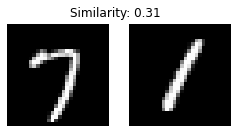

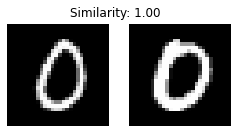

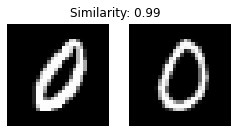

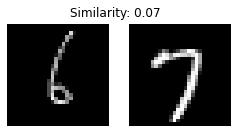

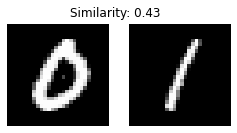

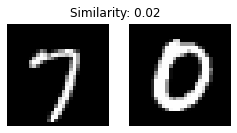

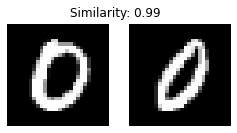

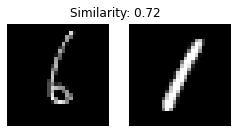

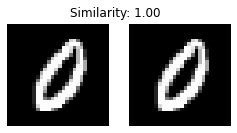

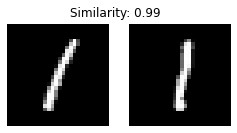

In [8]:
# loop over all image pairs
for (i, (pathA, pathB)) in enumerate(pairs):
	# load both the images and convert them to grayscale
	imageA = cv2.imread(pathA, 0)
	imageB = cv2.imread(pathB, 0)

	# Clone the two images such that we can draw/visualize them later
	origA = imageA.copy()
	origB = imageB.copy()

	# add channel a dimension to both the images
	imageA = np.expand_dims(imageA, axis=-1)
	imageB = np.expand_dims(imageB, axis=-1)

	# add a batch dimension to both images
	imageA = np.expand_dims(imageA, axis=0)
	imageB = np.expand_dims(imageB, axis=0)

	# Scale the pixel intensities to from the range [0, 255] to [0, 1]
	imageA = imageA / 255.0
	imageB = imageB / 255.0

	# Once imageA and imageB are preprocessed, we compare them for similarity by making a call to the .predict
	# use our siamese model to make predictions on the image pair,
	# indicating whether or not the images belong to the same class
	preds = model.predict([imageA, imageB])
	# output is similarity
	proba = preds[0][0]

	# initialize the figure
	fig = plt.figure("Pair #{}".format(i + 1), figsize=(4, 2))
	plt.suptitle("Similarity: {:.2f}".format(proba))

	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(origA, cmap=plt.cm.gray)
	plt.axis("off")

	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(origB, cmap=plt.cm.gray)
	plt.axis("off")

	# show the plot
	plt.show()